In [1]:
# Importing libararies 
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
housing = fetch_california_housing()

In [3]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
X = pd.DataFrame(housing.data, columns=housing.feature_names)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
y = pd.DataFrame(housing.target, columns=['target'])
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [8]:
X.shape

(20640, 8)

In [9]:
y.shape

(20640, 1)

In [10]:
# train test split 
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full,random_state=42)

In [11]:
print(X_train_full.shape)
print(X_test.shape)
print(X_train.shape)
print(X_valid.shape)


(15480, 8)
(5160, 8)
(11610, 8)
(3870, 8)


In [12]:
X_train.shape[1]

8

## Architecture Used 

In [13]:
X_train.shape[1:]

(8,)

In [14]:
LAYERS = [tf.keras.layers.Dense(30, activation="relu", input_shape = X_train.shape[1:]),
          tf.keras.layers.Dense(10, activation="relu"),
          tf.keras.layers.Dense(5, activation="relu"),
          tf.keras.layers.Dense(1)
          ]

In [15]:
model = tf.keras.models.Sequential(LAYERS)

In [16]:
LOSS = "mse"
OPTIMIZER  = "sgd"
model.compile(optimizer= OPTIMIZER, loss=LOSS)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [20]:
EPOCHS = 20
history = model.fit(X_train, y_train, epochs= EPOCHS, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 3s 4ms/step - loss: 0.6862 - val_loss: 0.4310
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4361 - val_loss: 0.4331
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4053 - val_loss: 0.4540
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3918 - val_loss: 0.4257
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3831 - val_loss: 0.3653
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3660 - val_loss: 0.3754
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3605 - val_loss: 0.3672
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3548 - val_loss: 0.3547
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3495 - val_loss: 0.3608
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3461 - val_loss: 0.3664

In [21]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.686237,0.430958
1,0.436143,0.433098
2,0.405252,0.454006
3,0.391785,0.425733
4,0.383061,0.365283
5,0.365993,0.375408
6,0.360545,0.367192
7,0.354756,0.354722
8,0.349487,0.360826
9,0.346083,0.366359


<AxesSubplot: >

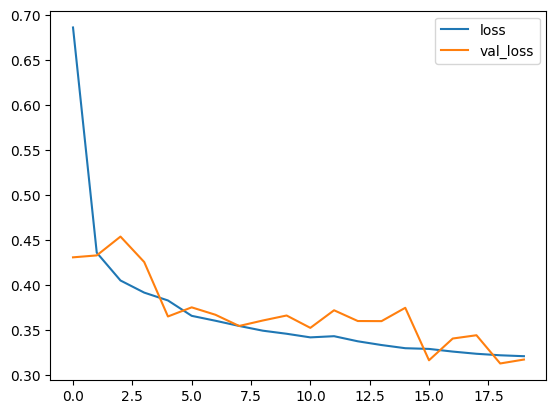

In [22]:
pd.DataFrame(history.history).plot()